<a href="https://colab.research.google.com/github/KaiaLee/CNN_practice/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

分別使用簡單CNN架構、Yann LeCun 等人1998 年提出的LeNet-5 架構

In [2]:
# 載入必要的庫
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [5]:
# 載入 MNIST 數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 顯示數據集的尺寸
print('Training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


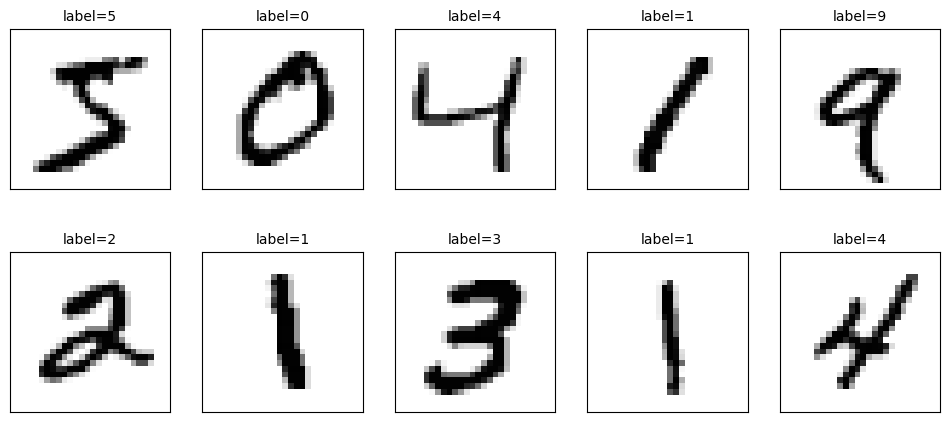

In [6]:
import matplotlib.pyplot as plt

# 建立函數要來畫多圖的
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):

  # 設定顯示圖形的大小
  fig= plt.gcf()
  fig.set_size_inches(12,14)

  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0,num):

    # 建立子圖形5*5(五行五列)
    ax=plt.subplot(5,5,i+1)

    # 畫出子圖形
    ax.imshow(images[idx],cmap='binary')

    # 標題和label
    title="label=" +str(labels[idx])

    # 如果有傳入預測結果也顯示
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    # 設定子圖形的標題大小
    ax.set_title(title,fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

plot_images_labels_prediction(train_images,train_labels,[],0,10)

# 簡單CNN架構

step 1. 載入 MNIST 數據集

In [18]:
# 載入 MNIST 數據集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

 將每張 28x28 像素的圖像重塑為四維數組 (批量大小batch size, 高度, 寬度, 通道數)，讓形狀符合 CNN 模型的輸入要求。\
 astype('float32')：將數據類型轉換為 float32，這是深度學習框架（如 TensorFlow/Keras）常用的數據類型，可以提高計算效率和數值穩定性。\
 / 255：將像素值從範圍 [0, 255] 轉換為 [0, 1] 範圍。這樣做有助於加快模型收斂速度，並提高訓練的穩定性。

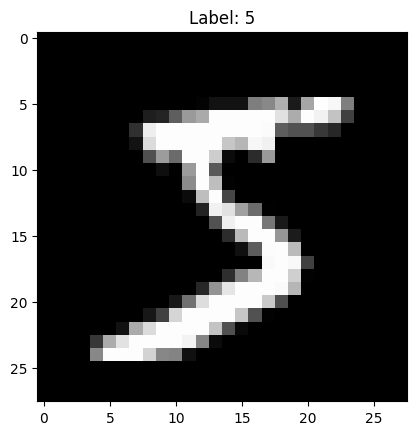

In [19]:
# 正規化數據
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# 檢查數據
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

step 2. 建立簡單的 CNN 模型

In [20]:
# 建立模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

step 3. 編譯模型

In [21]:
# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

step 4. 訓練

In [22]:
# 訓練模型
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 8s 9ms/step - loss: 0.2088 - accuracy: 0.9368 - val_loss: 0.0617 - val_accuracy: 0.9835
Epoch 2/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 3/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0344 - val_accuracy: 0.9907
Epoch 4/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0299 - val_accuracy: 0.9910
Epoch 5/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0235 - accuracy: 0.9919 - val_loss: 0.0398 - val_accuracy: 0.9873


step 5. 評估

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0423 - accuracy: 0.9869
Test accuracy: 0.9868999719619751


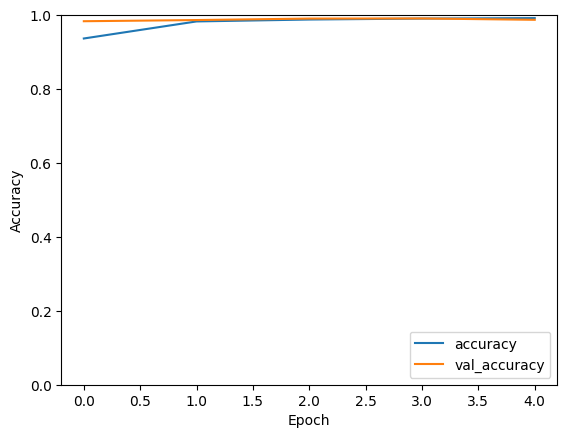

In [24]:
# 6. 繪製訓練過程中的準確率變化
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [25]:
# 檢查模型架構
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

使用混淆矩陣評估模型

313/313 [==============================] - 1s 3ms/step


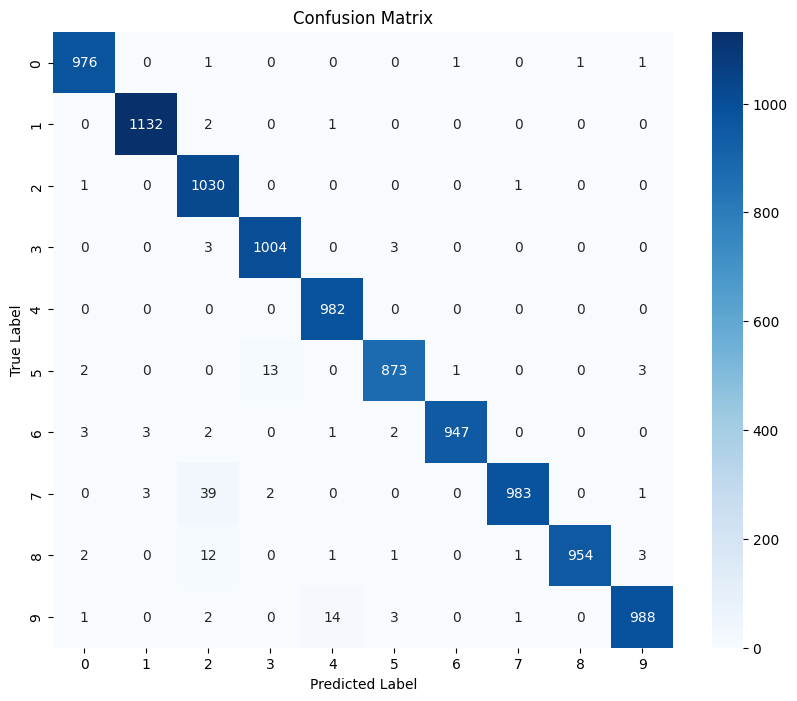

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 做出預測
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 取得概率最高的類別

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred_classes)

# 繪製混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 檢查過擬合
比較訓練和驗證的損失/準確率\
發現訓練準確率持續提高而驗證準確率開始下降，且訓練損失減少而驗證損失開始增加，都表示過擬合跡象。

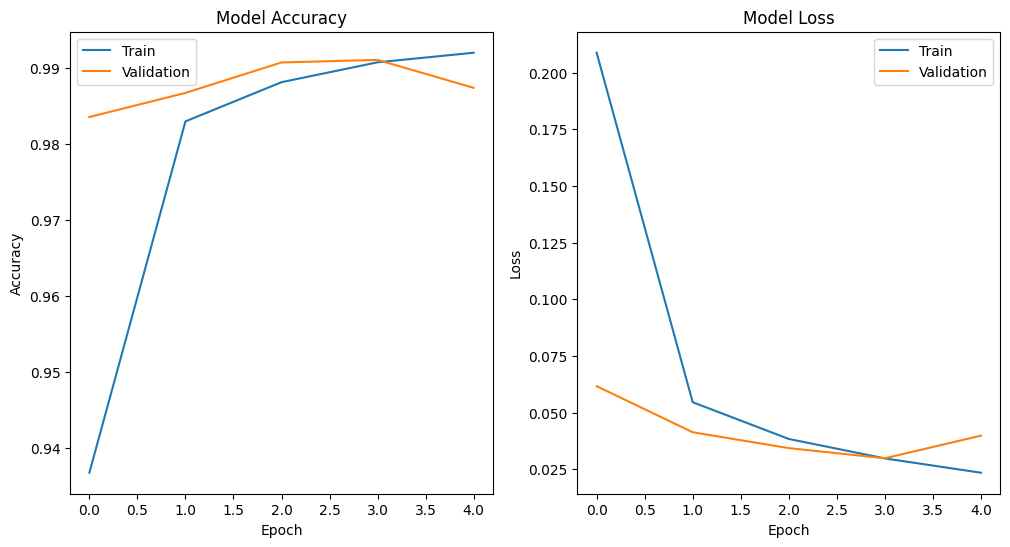

In [28]:
# 繪製訓練和驗證準確率
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# 繪製訓練和驗證損失
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


# 過擬合處理
## 1.數據增強：
透過對現有數據進行變換（例如旋轉、平移、翻轉和縮放）來增加訓練數據集的大小。這有助於模型更好地泛化，通過讓模型接觸到更多樣化的樣本。

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 使用增強數據來訓練模型
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) // 64,
                    epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
937/937 [==============================] - 23s 24ms/step - loss: 0.5790 - accuracy: 0.8103 - val_loss: 0.1135 - val_accuracy: 0.9613
Epoch 2/5
937/937 [==============================] - 23s 24ms/step - loss: 0.2873 - accuracy: 0.9088 - val_loss: 0.0862 - val_accuracy: 0.9728
Epoch 3/5
937/937 [==============================] - 23s 24ms/step - loss: 0.2363 - accuracy: 0.9259 - val_loss: 0.0732 - val_accuracy: 0.9765
Epoch 4/5
937/937 [==============================] - 22s 24ms/step - loss: 0.2047 - accuracy: 0.9347 - val_loss: 0.0704 - val_accuracy: 0.9779
Epoch 5/5
937/937 [==============================] - 23s 24ms/step - loss: 0.1907 - accuracy: 0.9402 - val_loss: 0.0787 - val_accuracy: 0.9748


313/313 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9748
Test accuracy: 0.9747999906539917


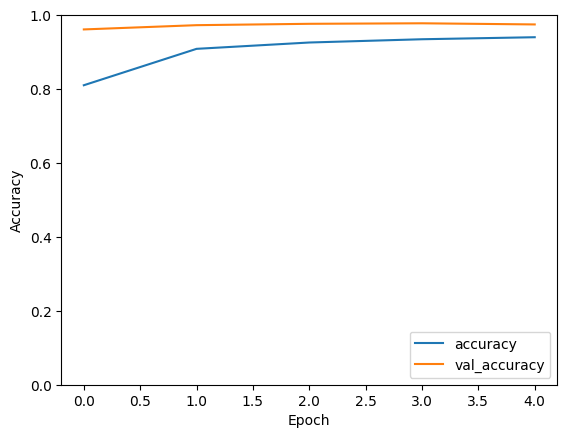

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

model.summary()

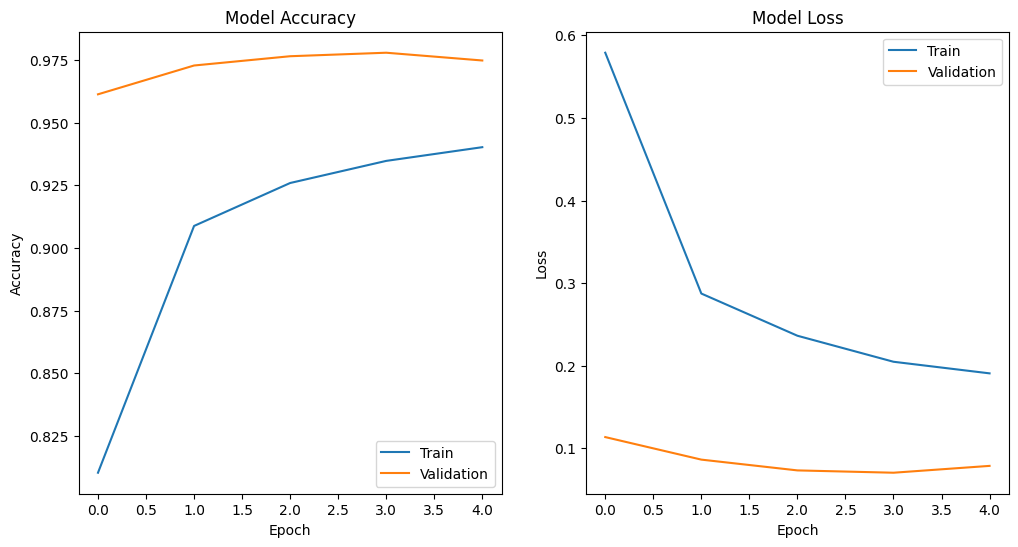

In [32]:
# 繪製訓練和驗證準確率
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# 繪製訓練和驗證損失
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

## 2. 正則化
L1/L2 正則化： 在損失函數中添加正則化項，以懲罰過大的權重，這有助於防止模型過擬合。

In [33]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.Flatten(),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])


Dropout： 在訓練過程中隨機丟棄一部分神經元，以防止它們過度適應。

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout層，丟棄率50%
    layers.Dense(10, activation='softmax')
])

## 3. 提前停止
在訓練過程中監控驗證損失，當損失不再改善時停止訓練過程。

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=64,
                    validation_split=0.1, callbacks=[early_stopping])

# 4. 減少模型複雜性
減少層數或每層中的單元數，使模型複雜性降低。

In [ ]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


## 5. 使用交叉驗證
將數據集分成多個折疊，並在數據的不同子集上訓練模型，以確保模型的良好泛化。

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(x_train_fold, y_train_fold, epochs=5, validation_data=(x_val_fold, y_val_fold))

In [36]:
from tensorflow.keras import models, layers
from sklearn.model_selection import KFold
import tensorflow as tf
import numpy as np

# Define a function to build the model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Define KFold cross-validation
kf = KFold(n_splits=5)

# Iterate through each fold
for train_index, val_index in kf.split(x_train):
    # Split the data into training and validation sets
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Build and compile the model
    model = build_model()

    # Train the model
    history = model.fit(x_train_fold, y_train_fold, epochs=5, validation_data=(x_val_fold, y_val_fold))

    # Optionally, you can evaluate the model on the validation fold and print the results
    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1722 - accuracy: 0.9472 - val_loss: 0.0707 - val_accuracy: 0.9789
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0530 - accuracy: 0.9830 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0426 - val_accuracy: 0.9868
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9877
Validation Loss: 0.04749445989727974, Validation Accuracy: 0.987666666507721
Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1720 - accuracy: 0.9481 - val_loss: 0.0524 - val_accuracy: 0.9821
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0522 - accuracy: 0.9834 - 

313/313 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


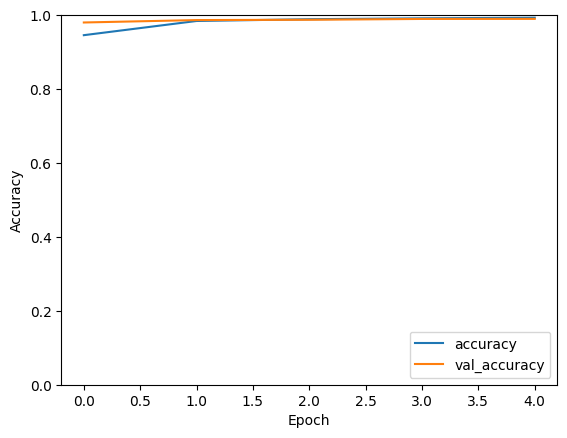

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 576)              

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

model.summary()

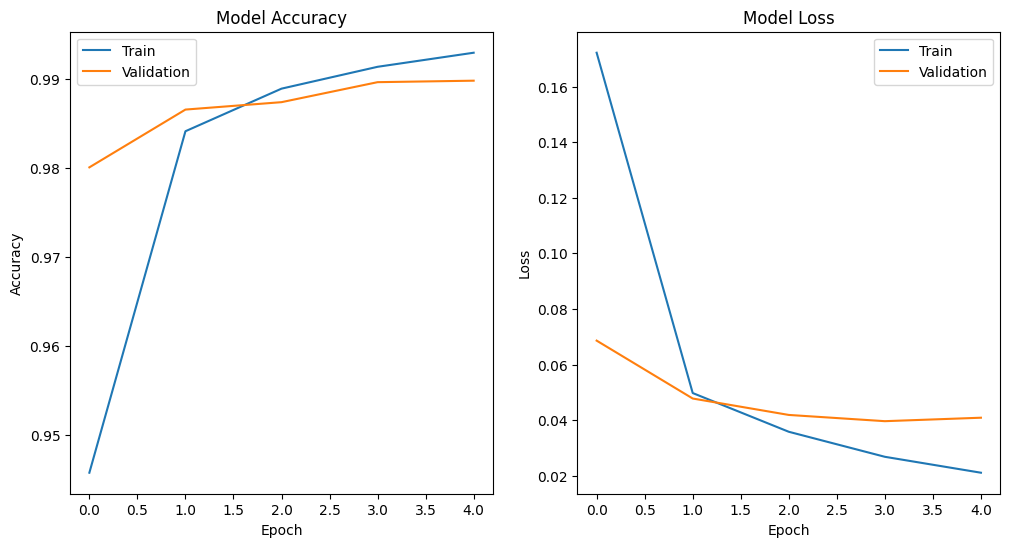

In [38]:
# 繪製訓練和驗證準確率
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# 繪製訓練和驗證損失
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

# 流程圖

In [16]:
!pip install pydot
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


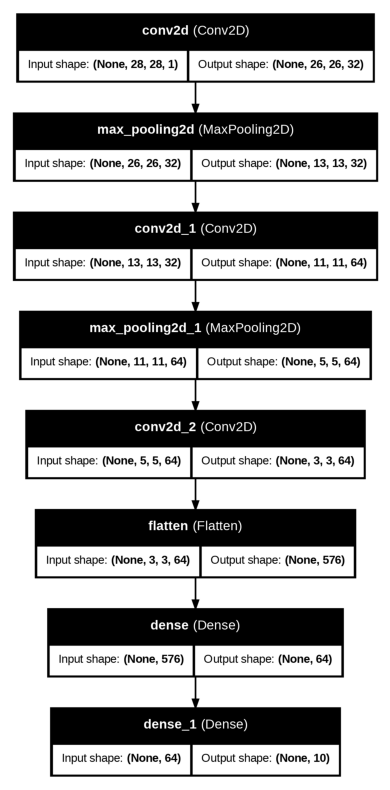

In [17]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from PIL import Image

# 可視化模型結構
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# 顯示圖片
img = plt.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

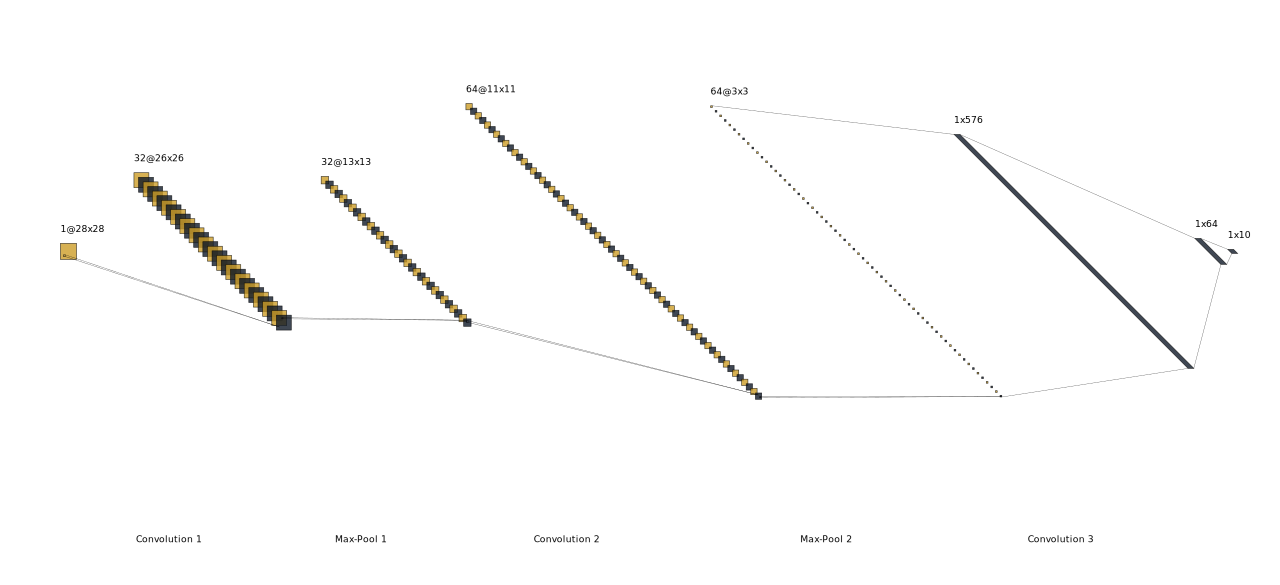

In [50]:
from IPython.display import SVG, display

# 顯示 SVG 文件
display(SVG('/content/CNN(2).svg'))

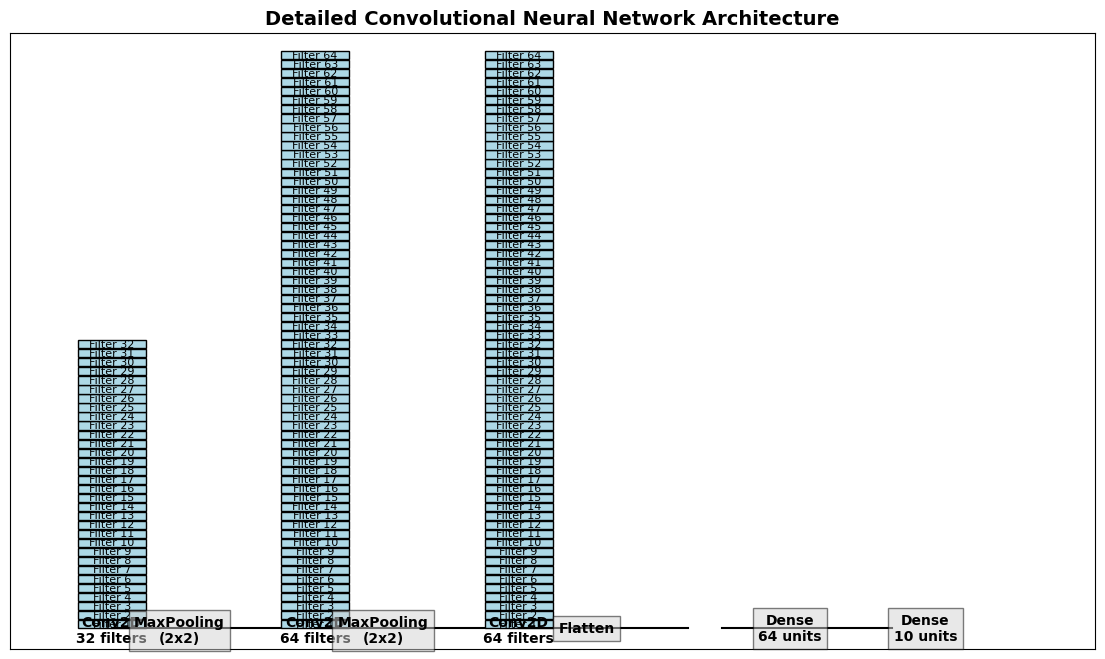

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_conv_layer(ax, position, num_filters, filter_size, layer_name):
    width, height = filter_size
    for i in range(num_filters):
        rect = patches.Rectangle((position[0], position[1] + i * (height + 0.2)), width, height, linewidth=1, edgecolor='black', facecolor='lightblue')
        ax.add_patch(rect)
        ax.text(position[0] + width / 2, position[1] + i * (height + 0.2) + height / 2, f'Filter {i + 1}', ha='center', va='center', fontsize=8)
    ax.text(position[0] + width / 2, position[1] - 0.5, layer_name, ha='center', va='center', fontsize=10, fontweight='bold')

def draw_model_architecture():
    fig, ax = plt.subplots(figsize=(14, 8))

    # 設置坐標軸
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 150)
    ax.set_xticks([])
    ax.set_yticks([])

    # 繪製卷積層
    draw_conv_layer(ax, (1, 5), num_filters=32, filter_size=(1, 2), layer_name='Conv2D\n32 filters')
    draw_conv_layer(ax, (4, 5), num_filters=64, filter_size=(1, 2), layer_name='Conv2D\n64 filters')
    draw_conv_layer(ax, (7, 5), num_filters=64, filter_size=(1, 2), layer_name='Conv2D\n64 filters')

    # 繪製池化層
    ax.text(2.5, 4.5, 'MaxPooling\n(2x2)', ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='lightgrey', alpha=0.5))
    ax.text(5.5, 4.5, 'MaxPooling\n(2x2)', ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='lightgrey', alpha=0.5))

    # 繪製展平層和全連接層
    ax.text(8.5, 5, 'Flatten', ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='lightgrey', alpha=0.5))
    ax.text(11.5, 5, 'Dense\n64 units', ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='lightgrey', alpha=0.5))
    ax.text(13.5, 5, 'Dense\n10 units', ha='center', va='center', fontsize=10, fontweight='bold', bbox=dict(facecolor='lightgrey', alpha=0.5))

    # 連接層
    ax.plot([1.5, 4], [5, 5], 'k-')
    ax.plot([4.5, 7], [5, 5], 'k-')
    ax.plot([7.5, 10], [5, 5], 'k-')
    ax.plot([10.5, 13], [5, 5], 'k-')

    # 標題
    plt.title('Detailed Convolutional Neural Network Architecture', fontsize=14, fontweight='bold')

    plt.show()

# 畫出模型架構
draw_model_architecture()


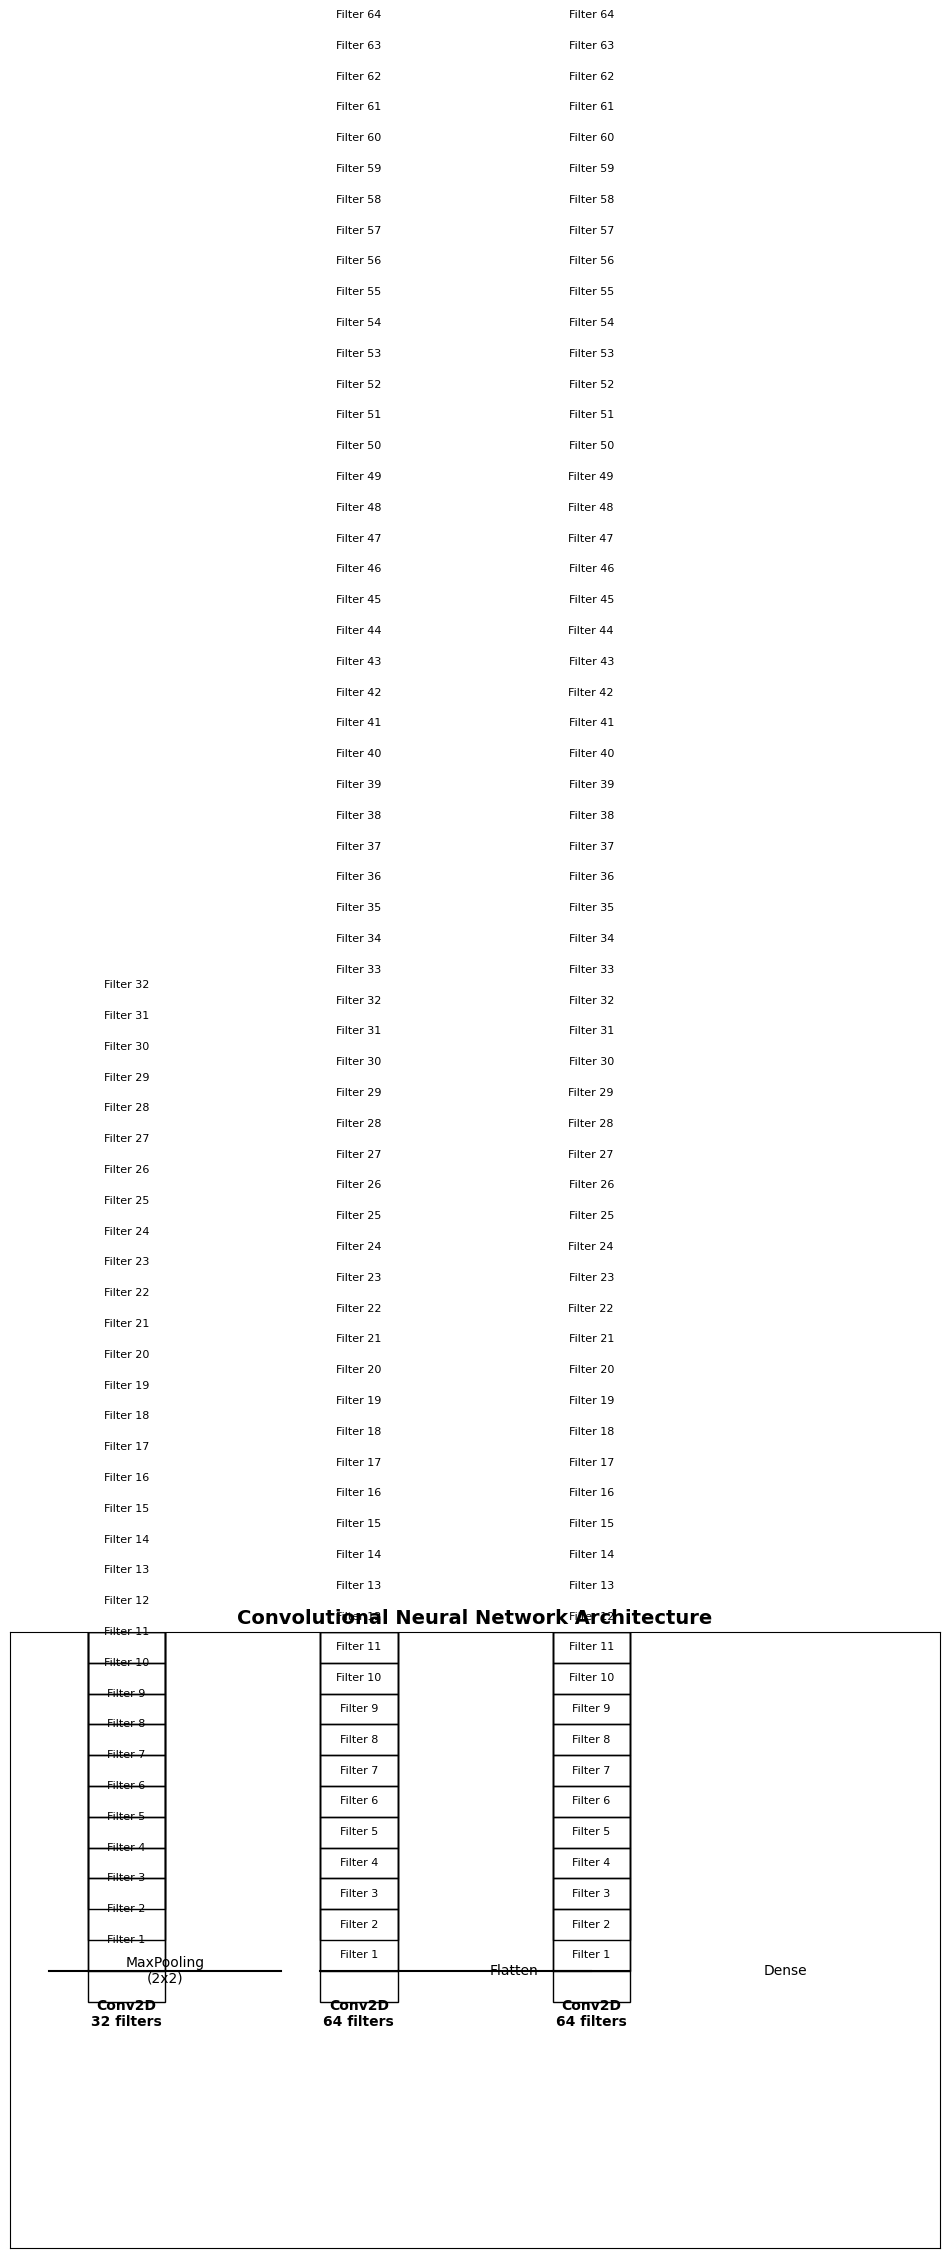

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_conv_layer(ax, position, num_filters, filter_size, layer_name):
    for i in range(num_filters):
        rect = patches.Rectangle((position[0], position[1] + i * 0.5), filter_size[0], filter_size[1], linewidth=1, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
        ax.text(position[0] + filter_size[0] / 2, position[1] + i * 0.5 + filter_size[1] / 2, f'Filter {i + 1}', ha='center', va='center', fontsize=8)

    ax.text(position[0] + filter_size[0] / 2, position[1] - 0.2, layer_name, ha='center', va='center', fontsize=10, fontweight='bold')

def draw_model_architecture():
    fig, ax = plt.subplots(figsize=(12, 8))

    # 設置坐標軸
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])

    # 繪製層
    draw_conv_layer(ax, (1, 4), num_filters=32, filter_size=(1, 2), layer_name='Conv2D\n32 filters')
    draw_conv_layer(ax, (4, 4), num_filters=64, filter_size=(1, 1.5), layer_name='Conv2D\n64 filters')
    draw_conv_layer(ax, (7, 4), num_filters=64, filter_size=(1, 1.5), layer_name='Conv2D\n64 filters')

    # 繪製其他層
    ax.plot([0.5, 1], [4.5, 4.5], 'k-')
    ax.plot([1, 3.5], [4.5, 4.5], 'k-')
    ax.plot([4, 5], [4.5, 4.5], 'k-')
    ax.plot([5, 7.5], [4.5, 4.5], 'k-')
    ax.plot([7, 8], [4.5, 4.5], 'k-')

    ax.text(2, 4.5, 'MaxPooling\n(2x2)', ha='center', va='center', fontsize=10)
    ax.text(6.5, 4.5, 'Flatten', ha='center', va='center', fontsize=10)
    ax.text(10, 4.5, 'Dense', ha='center', va='center', fontsize=10)

    plt.title('Convolutional Neural Network Architecture', fontsize=14, fontweight='bold')
    plt.show()

# 畫出模型架構
draw_model_architecture()


# 簡單的 LeNet-5 架構

step 1. 載入 MNIST 數據集

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

step 2. 建立簡單的 LeNet-5 模型

In [17]:
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.AvgPool2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AvgPool2D((2, 2)),
    layers.Conv2D(120, (3, 3), activation='relu'), # 使用 3x3 的卷積核
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

step 3. 編譯模型

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

step 4. 訓練

In [19]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 7s 7ms/step - loss: 0.3184 - accuracy: 0.9045 - val_loss: 0.1062 - val_accuracy: 0.9678
Epoch 2/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0896 - accuracy: 0.9725 - val_loss: 0.0642 - val_accuracy: 0.9820
Epoch 3/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0490 - val_accuracy: 0.9843
Epoch 4/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0493 - val_accuracy: 0.9867
Epoch 5/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0525 - val_accuracy: 0.9832


step 5. 評估

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9840
Test accuracy: 0.984000027179718


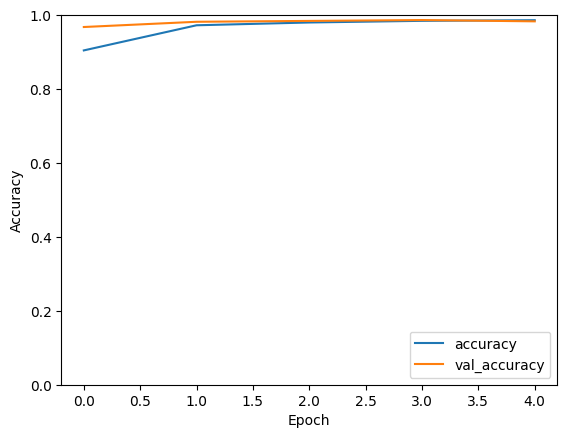

In [21]:
# 6. 繪製訓練過程中的準確率變化
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [22]:
# 檢查模型架構
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 120)         17400     
                                                                 
 flatten_4 (Flatten)         (None, 480)              

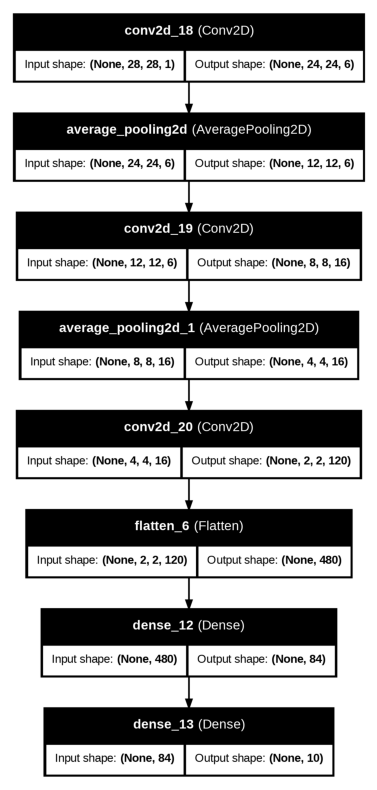

In [45]:
# 安装 pydot 和 graphviz 库
!pip install pydot graphviz

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 定义模型
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.AvgPool2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AvgPool2D((2, 2)),
    layers.Conv2D(120, (3, 3), activation='relu'), # 使用 3x3 的卷积核
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 编译模型（此步骤在生成结构图时并不必要，只是为了展示完整的代码）
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 可视化模型结构
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# 显示图片
img = mpimg.imread('model_architecture.png')
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


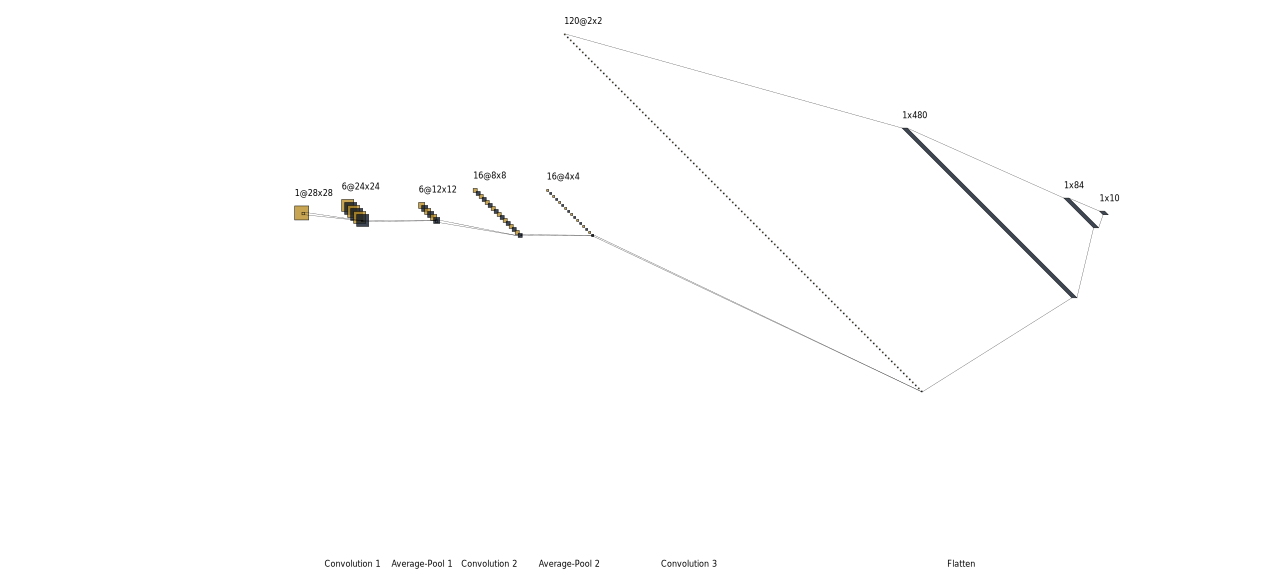

In [51]:
from IPython.display import SVG, display

# 顯示 SVG 文件
display(SVG('/content/LeNet-5.svg'))

In [48]:
import plotly.graph_objects as go
import numpy as np

# Define the model architecture
layers = [
    {"name": "Input", "shape": "(28, 28, 1)", "type": "Input"},
    {"name": "Conv2D", "shape": "(24, 24, 6)", "type": "Conv2D", "filters": 6, "kernel": "(5, 5)"},
    {"name": "AvgPool2D", "shape": "(12, 12, 6)", "type": "AvgPool2D"},
    {"name": "Conv2D", "shape": "(8, 8, 16)", "type": "Conv2D", "filters": 16, "kernel": "(5, 5)"},
    {"name": "AvgPool2D", "shape": "(4, 4, 16)", "type": "AvgPool2D"},
    {"name": "Conv2D", "shape": "(2, 2, 120)", "type": "Conv2D", "filters": 120, "kernel": "(3, 3)"},
    {"name": "Flatten", "shape": "(480,)", "type": "Flatten"},
    {"name": "Dense", "shape": "(84,)", "type": "Dense", "units": 84},
    {"name": "Dense", "shape": "(10,)", "type": "Dense", "units": 10},
]

# Create figure
fig = go.Figure()

# Add nodes
for i, layer in enumerate(layers):
    shape = layer["shape"]
    if layer["type"] in ["Conv2D", "Dense"]:
        label = f'{layer["name"]}<br>Shape: {shape}<br>Type: {layer["type"]}'
    else:
        label = f'{layer["name"]}<br>Shape: {shape}<br>Type: {layer["type"]}'

    fig.add_trace(go.Scatter(
        x=[i], y=[0], mode='markers+text', text=[label],
        textposition='top center', marker=dict(size=30, color='lightblue', line=dict(width=2, color='black')),
        name=layer["name"]
    ))

# Add connections
for i in range(len(layers) - 1):
    fig.add_trace(go.Scatter(
        x=[i, i + 1], y=[0, 0], mode='lines',
        line=dict(width=2, color='gray'),
        showlegend=False
    ))

# Update layout
fig.update_layout(
    title='CNN Architecture',
    xaxis=dict(
        showgrid=False, showticklabels=False, zeroline=False,
        range=[-0.5, len(layers) - 0.5]
    ),
    yaxis=dict(
        showgrid=False, showticklabels=False, zeroline=False,
        range=[-1, 1]
    ),
    showlegend=False
)

# Show figure
fig.show()


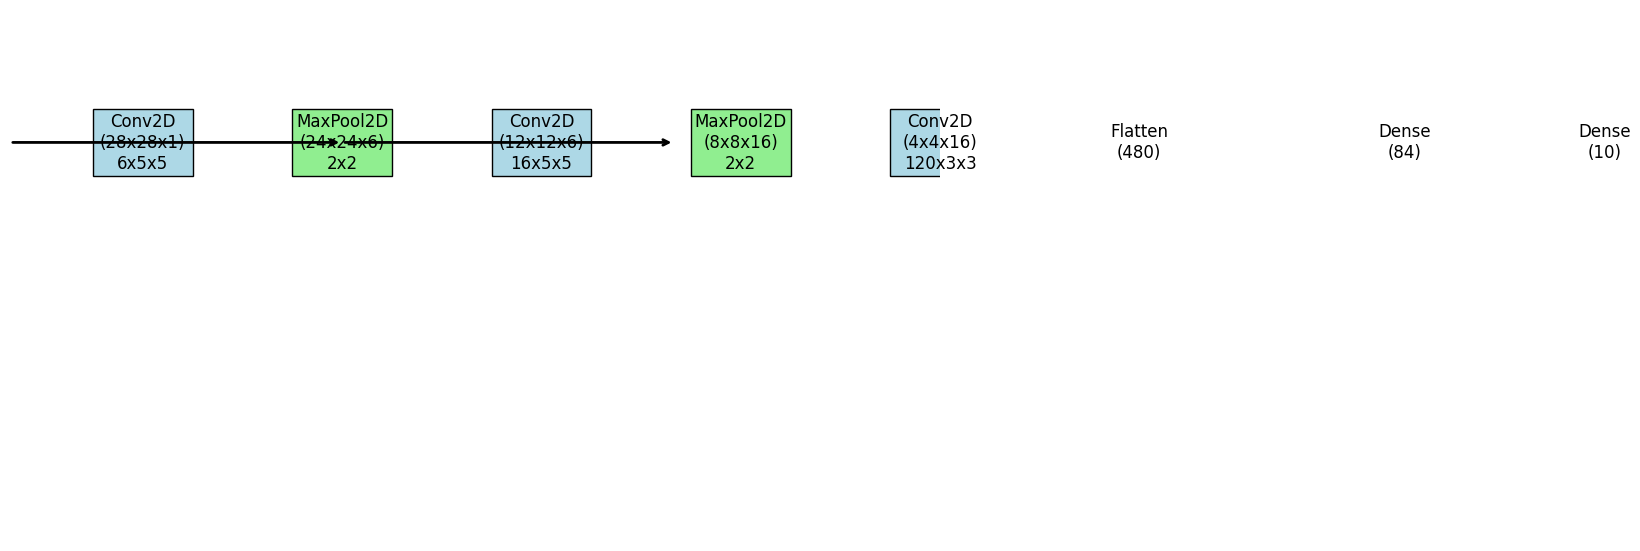

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_conv_layer(ax, center, size, name, color='lightblue'):
    rect = patches.Rectangle((center[0] - size[0] / 2, center[1] - size[1] / 2), size[0], size[1],
                             linewidth=1, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    ax.text(center[0], center[1], name, fontsize=12, ha='center', va='center', color='black')

def draw_model_architecture():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set up the axes
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 8)
    ax.set_aspect('equal')
    ax.axis('off')

    # Draw Conv2D layers
    draw_conv_layer(ax, (2, 6), (1.5, 1.0), 'Conv2D\n(28x28x1)\n6x5x5', 'lightblue')
    draw_conv_layer(ax, (5, 6), (1.5, 1.0), 'MaxPool2D\n(24x24x6)\n2x2', 'lightgreen')
    draw_conv_layer(ax, (8, 6), (1.5, 1.0), 'Conv2D\n(12x12x6)\n16x5x5', 'lightblue')
    draw_conv_layer(ax, (11, 6), (1.5, 1.0), 'MaxPool2D\n(8x8x16)\n2x2', 'lightgreen')
    draw_conv_layer(ax, (14, 6), (1.5, 1.0), 'Conv2D\n(4x4x16)\n120x3x3', 'lightblue')

    # Draw Flatten layer
    draw_conv_layer(ax, (17, 6), (2.5, 1.0), 'Flatten\n(480)', 'lightcoral')

    # Draw Dense layers
    draw_conv_layer(ax, (21, 6), (2.5, 1.0), 'Dense\n(84)', 'lightblue')
    draw_conv_layer(ax, (24, 6), (2.5, 1.0), 'Dense\n(10)', 'lightblue')

    # Draw arrows between layers
    for i in range(1, 6):
        ax.annotate('', xy=(5 * i, 6), xytext=(5 * (i - 1), 6),
                    arrowprops=dict(arrowstyle='->', lw=2))

    # Draw arrows for Dense layers
    ax.annotate('', xy=(17, 6), xytext=(14, 6),
                arrowprops=dict(arrowstyle='->', lw=2))
    ax.annotate('', xy=(21, 6), xytext=(17, 6),
                arrowprops=dict(arrowstyle='->', lw=2))

    plt.show()

draw_model_architecture()
